# Elon Musk Tweets Analysis

## Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob # TextBlob library for sentiment analysis
from wordcloud import WordCloud, STOPWORDS # WordCloud for visualization of text data, STOPWORDS to eliminate unimportant words

## Importing the data set

In [3]:
elon_tweets= pd.read_csv("elonmusk_tweets.csv")

In [4]:
elon_tweets

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw'
2815,142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...
2817,142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o..."


In [5]:
elon_tweets.dtypes

id             int64
created_at    object
text          object
dtype: object

## Cleaning the data

### Converting created_at to date time format

In [6]:
elon_tweets["created_at"]= pd.to_datetime(elon_tweets["created_at"]).dt.date.astype('datetime64')

In [7]:
elon_tweets.head()

,id,created_at,text
0,849636868052275200,2017-04-05,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [8]:
elon_tweets.dtypes

id                     int64
created_at    datetime64[ns]
text                  object
dtype: object

### Checking for missing values

In [9]:
elon_tweets.isna()

,id,created_at,text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2814,False,False,False
2815,False,False,False
2816,False,False,False
2817,False,False,False


In [10]:
elon_tweets.isna().sum()

id            0
created_at    0
text          0
dtype: int64

There are no missing values

### Removing unwanted values in the comment section

We'll remove all underscores(b, @, ', ", RT) in the data

In [11]:
elon_tweets

,id,created_at,text
0,849636868052275200,2017-04-05,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...,...
2814,142881284019060736,2011-12-03,b'That was a total non sequitur btw'
2815,142880871391838208,2011-12-03,"b'Great Voltaire quote, arguably better than T..."
2816,142188458125963264,2011-12-01,b'I made the volume on the Model S http://t.co...
2817,142179928203460608,2011-12-01,"b""Went to Iceland on Sat to ride bumper cars o..."


In [12]:
elon_tweets["text"]= elon_tweets["text"].str.replace('[\@]', '', regex=True)

In [13]:
elon_tweets["text"]= elon_tweets["text"].str.replace("RT", "")

In [14]:
elon_tweets["text"]= elon_tweets["text"].str.replace("b", "")

In [15]:
elon_tweets

,id,created_at,text
0,849636868052275200,2017-04-05,'And so the roots spared humanity ... https://...
1,848988730585096192,2017-04-03,"""ForIn2020 waltmosserg mims defcon_5 Exactly. ..."
2,848943072423497728,2017-04-03,"'waltmosserg mims defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03,'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02,"""DaveLeeBBC verge Coal is dying due to nat gas..."
...,...,...,...
2814,142881284019060736,2011-12-03,'That was a total non sequitur tw'
2815,142880871391838208,2011-12-03,"'Great Voltaire quote, argualy etter than Twai..."
2816,142188458125963264,2011-12-01,'I made the volume on the Model S http://t.co/...
2817,142179928203460608,2011-12-01,"""Went to Iceland on Sat to ride umper cars on ..."


In [16]:
elon_tweets["text"]= elon_tweets["text"].str.replace('[\""]', '', regex=True)

In [17]:
elon_tweets["text"]= elon_tweets["text"].str.replace("[\'']", '', regex=True)

In [18]:
elon_tweets

,id,created_at,text
0,849636868052275200,2017-04-05,And so the roots spared humanity ... https://t...
1,848988730585096192,2017-04-03,ForIn2020 waltmosserg mims defcon_5 Exactly. T...
2,848943072423497728,2017-04-03,"waltmosserg mims defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02,DaveLeeBBC verge Coal is dying due to nat gas ...
...,...,...,...
2814,142881284019060736,2011-12-03,That was a total non sequitur tw
2815,142880871391838208,2011-12-03,"Great Voltaire quote, argualy etter than Twain..."
2816,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01,Went to Iceland on Sat to ride umper cars on i...


The text column is clean of all unwanted values

## Main Tasks in this Project
* Performing sentiment analysis on Youtube comments
* Performing exploratory data analysis on positive sentences
* Performing exploratory data analysis on negative sentences

In [19]:
# Polarity of a sentence helps check if a statement is 
# positive or negative
# Polarity simply ddefines the orientation of the expressed statement

# Polarity value for Positive- [>0 and <=1] or 1
# Polarity value for Negative- [<0 and >=-1] or -1
# Polarity value for Neutral- >-1 and <1

In [20]:
elon_tweets

,id,created_at,text
0,849636868052275200,2017-04-05,And so the roots spared humanity ... https://t...
1,848988730585096192,2017-04-03,ForIn2020 waltmosserg mims defcon_5 Exactly. T...
2,848943072423497728,2017-04-03,"waltmosserg mims defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03,Stormy weather in Shortville ...
4,848416049573658624,2017-04-02,DaveLeeBBC verge Coal is dying due to nat gas ...
...,...,...,...
2814,142881284019060736,2011-12-03,That was a total non sequitur tw
2815,142880871391838208,2011-12-03,"Great Voltaire quote, argualy etter than Twain..."
2816,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/w...
2817,142179928203460608,2011-12-01,Went to Iceland on Sat to ride umper cars on i...


### Storing all sentiments of the texts into one variable

In [21]:
polarity = []
for i in elon_tweets["text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [22]:
elon_tweets["polarity"]= polarity

In [23]:
elon_tweets

,id,created_at,text,polarity
0,849636868052275200,2017-04-05,And so the roots spared humanity ... https://t...,0.000000
1,848988730585096192,2017-04-03,ForIn2020 waltmosserg mims defcon_5 Exactly. T...,0.000000
2,848943072423497728,2017-04-03,"waltmosserg mims defcon_5 Et tu, Walt?",0.000000
3,848935705057280001,2017-04-03,Stormy weather in Shortville ...,0.000000
4,848416049573658624,2017-04-02,DaveLeeBBC verge Coal is dying due to nat gas ...,-0.162500
...,...,...,...,...
2814,142881284019060736,2011-12-03,That was a total non sequitur tw,0.000000
2815,142880871391838208,2011-12-03,"Great Voltaire quote, argualy etter than Twain...",0.437500
2816,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/w...,0.000000
2817,142179928203460608,2011-12-01,Went to Iceland on Sat to ride umper cars on i...,0.600000


## Exploratory Data Analysis

In [28]:
tweets_positive= elon_tweets[elon_tweets["polarity"]==1]
tweets_positive

,id,created_at,text,polarity
71,845285144436998144,2017-03-24,oykansara: MrThorman elonmusk My Model X is t...,1.0
139,835350234049863680,2017-02-25,Roller coasters are awesome,1.0
145,834740218531962881,2017-02-23,Excellent Tesla Model X review https://t.co/wv...,1.0
174,832084918645596166,2017-02-16,"Floydilicious Yeah, awesome achievement y ISRO...",1.0
180,831692803210096641,2017-02-15,lollieshopMOM Best place to watch is on the Ca...,1.0
222,828298780638400512,2017-02-05,"rendangage I agree, great country! Looking for...",1.0
440,799910793156259841,2016-11-19,itsjasonwhite TeslaMotors perfect,1.0
476,794726788689629184,2016-11-05,SeltzerPlease PlayOverwatch My kids and I are ...,1.0
501,794549250654777345,2016-11-04,Great Model X article y BBC_TopGear! https://t...,1.0
571,785495295652167680,2016-10-10,jovanik21 arstechnica drgitlin Sounds like a g...,1.0


In [29]:
tweets_positive.shape

(35, 4)

In [30]:
tweets_positive.head()

,id,created_at,text,polarity
71,845285144436998144,2017-03-24,oykansara: MrThorman elonmusk My Model X is t...,1.0
139,835350234049863680,2017-02-25,Roller coasters are awesome,1.0
145,834740218531962881,2017-02-23,Excellent Tesla Model X review https://t.co/wv...,1.0
174,832084918645596166,2017-02-16,"Floydilicious Yeah, awesome achievement y ISRO...",1.0
180,831692803210096641,2017-02-15,lollieshopMOM Best place to watch is on the Ca...,1.0


## Visualize Positive Tweets using WordCloud

In [32]:
# word cloud is a data visualization techniques used for representing text data
# and from which we can get to know the word size
# Size of the word indicates its frequency or importance
# Bigger size of word means it has a high frequency and more used

In [33]:
# This will take the unique words that are unimportant to us
stopwords= set(STOPWORDS)

### Looking into the Positive Tweets

In [36]:
total_tweets= positive_tweets["text"]
total_tweets

71       oykansara: MrThorman elonmusk My Model X is t...
139                           Roller coasters are awesome
145     Excellent Tesla Model X review https://t.co/wv...
174     Floydilicious Yeah, awesome achievement y ISRO...
180     lollieshopMOM Best place to watch is on the Ca...
222     rendangage I agree, great country! Looking for...
440                     itsjasonwhite TeslaMotors perfect
476     SeltzerPlease PlayOverwatch My kids and I are ...
501     Great Model X article y BBC_TopGear! https://t...
571     jovanik21 arstechnica drgitlin Sounds like a g...
755                           westcoastill happy irthday!
793     MacTechGenius V8 will e our iggest release sin...
798               Tyler_K_Berg That is a very good point!
967      juanmtrejo: Guys! Why arent you sharing this?...
1081              drew SpaceX Not from us, ut its awesome
1231     alexisgeo: Tesla\s Model X Is Mind Blowing in...
1320    11 satellites deployed to target orit and Falc...
1348          

In [44]:
# This will store total of all sentences which were individually stored in the column comment_text
total_positive_tweets= "".join(positive_tweets["text"])
total_positive_tweets

' oykansara: MrThorman elonmusk My Model X is the greatest thing I have ever purchased. Period.Roller coasters are awesomeExcellent Tesla Model X review https://t.co/wvog4Po1oFloydilicious Yeah, awesome achievement y ISRO. Very impressive!lollieshopMOM Best place to watch is on the Cape causewayrendangage I agree, great country! Looking forward to taking my kids for a visit. Ive heard it is incredily eautiful.itsjasonwhite TeslaMotors perfectSeltzerPlease PlayOverwatch My kids and I are having a great time!Great Model X article y BBC_TopGear! https://t.co/yXdwyQVkVgjovanik21 arstechnica drgitlin Sounds like a great move!westcoastill happy irthday!MacTechGenius V8 will e our iggest release since v1, so taking longer to refine. Awesome on every level. Meeting w design team every day.Tyler_K_Berg That is a very good point! juanmtrejo: Guys! Why arent you sharing this? Its awesome sauce! https://t.co/0NdQPY3RE TeslaMotors elonmuskdrew SpaceX Not from us, ut its awesome alexisgeo: Tesla\\s 

### Using WordCloud

In [46]:
# To form the WordCloud
wordcloud= WordCloud(width=2000, height= 500, stopwords= stopwords).generate(total_positive_tweets)

(-0.5, 1999.5, 499.5, -0.5)

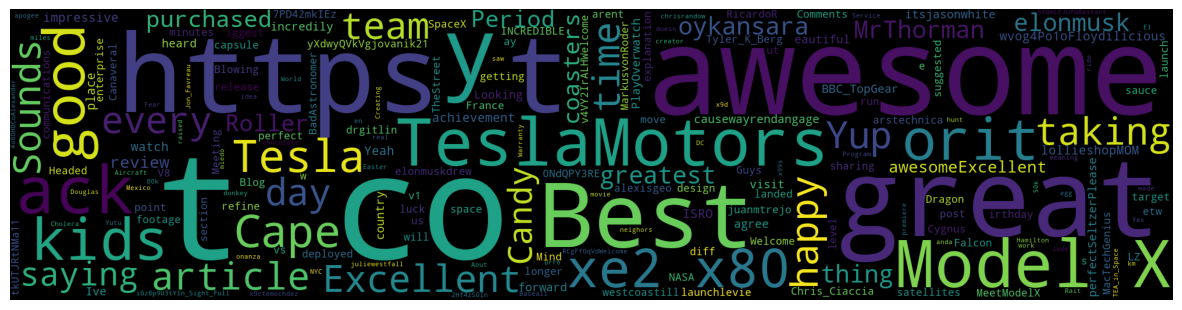

In [47]:
# Show the wordcloud with the following code
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

### Looking into the Negative Tweets

In [51]:
tweets_negative= elon_tweets[elon_tweets["polarity"]==-1]
tweets_negative

,id,created_at,text,polarity
416,810126493326209025,2016-12-17,"Boring, its what we do",-1.0
417,810126376871297024,2016-12-17,It shall e called The Boring Company,-1.0
1802,513574020047208448,2014-09-21,SpaceX: [PHOTO] Liftoff!! Falcon 9 lifts off ...,-1.0


In [52]:
tweets_negative.shape

(3, 4)

In [63]:
total_negative_tweets= "".join(tweets_negative["text"])
total_negative_tweets

'Boring, its what we doIt shall e called The Boring Company SpaceX: [PHOTO] Liftoff!! Falcon 9 lifts off from LC-40 at Cape Canaveral carrying Dragon to resupply the space station. http://t.co/iL\\xe2\\x80\\xa6'

### Using WordCloud

In [65]:
# To form the WordCloud
wordcloud= WordCloud(width=2000, height= 500, stopwords= stopwords).generate(total_negative_tweets)

(-0.5, 1999.5, 499.5, -0.5)

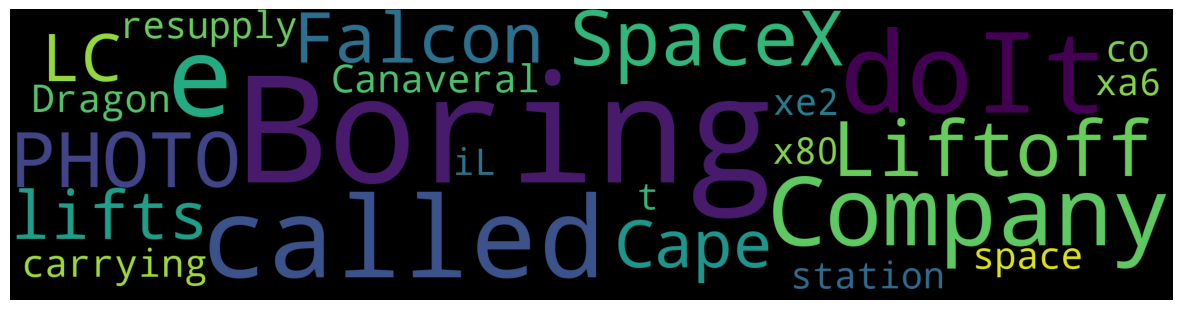

In [66]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")